In [ ]:
#Importing Necessary Libraries
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
import warnings 
import zipfile
import tqdm
import joblib
 
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
 
 
warnings.filterwarnings('ignore')

In [ ]:
#Extracting Data Through Culwget
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1617290206&Signature=Sd9FymmKzX44YC3VbQqxaRVCnUJu9EOlbh%2Fyd6D34DMNJnZ7z3QSbS0srZxwtpOFLuysdqw78g72hfRz%2Bz6c6%2FN%2FwKkodU0%2F22KcQsHG9sDRPPF9d47YnrZkxLInmCXEt0uOSXxI5gsjmy1GnNsPM7C1IviT3dNHk9Eil3PK42EjUfc8V%2FAhRzCfBzpF6CNSNgXsCm7mH7mNRdGQE%2FD4n81PbvL6yqiZr0c1pmx7NMxlnDVeByEyHHdOXcjvQ1VkGnR11tTNeQqO3tvVJ10CHKLq7cuFyWo%2F32Ow%2BjgDyfioEjVbNGLhijDFLKLbJbo02Zy1FF2Vk3NUVVHSfk%2BjiQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -c -O 'train.csv.zip'

--2021-03-30 13:14:36--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1617290206&Signature=Sd9FymmKzX44YC3VbQqxaRVCnUJu9EOlbh%2Fyd6D34DMNJnZ7z3QSbS0srZxwtpOFLuysdqw78g72hfRz%2Bz6c6%2FN%2FwKkodU0%2F22KcQsHG9sDRPPF9d47YnrZkxLInmCXEt0uOSXxI5gsjmy1GnNsPM7C1IviT3dNHk9Eil3PK42EjUfc8V%2FAhRzCfBzpF6CNSNgXsCm7mH7mNRdGQE%2FD4n81PbvL6yqiZr0c1pmx7NMxlnDVeByEyHHdOXcjvQ1VkGnR11tTNeQqO3tvVJ10CHKLq7cuFyWo%2F32Ow%2BjgDyfioEjVbNGLhijDFLKLbJbo02Zy1FF2Vk3NUVVHSfk%2BjiQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456337398 (435M) [application/zip]
Saving to: ‘train.csv.zip’

train.csv.zip 

In [ ]:
#How to unizip folder: https://stackoverflow.com/questions/50714467/extract-zip-files-using-python

def unzip_folder(zip_folder, destination):
        """
        Args:
            zip_folder (string): zip folder to be unzipped
            destination (string): path of destination folder
            pwd(string): zip folder password

        """
        with zipfile.ZipFile(zip_folder) as zf:
            zf.extractall(
                destination)


#unzipping train 
source = 'train.csv.zip'
destination = ''
unzip_folder(source, destination)

In [ ]:
#https://biosppy.readthedocs.io/en/stable/#:~:text=BioSPPy%20is%20a%20toolbox%20for,torwards%20the%20analysis%20of%20biosignals.

!pip install biosppy

     |████████████████████████████████| 81kB 3.5MB/s 


In [ ]:
#Importing necessary Libraries

from biosppy.signals import ecg, resp, eeg
import scipy.signal as signal
from scipy.interpolate import interp1d

In [ ]:
#Getting all Derived Features
def get_derived_names(f_name, eeg_features):
    
    derived_lst = []
    for eeg_feat in eeg_features:
        derived_lst.append(eeg_feat + f_name)
    
    return derived_lst

In [ ]:
from scipy.interpolate import interp1d

#this function helps to get the Heart beat information at every Time Stamp
def interpolation_method(timestamps, bios_time, bios_rate):
    f = interp1d(bios_time, bios_rate, kind='cubic', fill_value="extrapolate")
    return f(timestamps)  #Here we get interpolated values 

In [ ]:
#applying MinMax features

#MinmaxScaling
from sklearn.preprocessing import MinMaxScaler

def min_max_features(data):  
    #creating min max object
    min_max_scaler = MinMaxScaler()
    
    #transforming
    test_data_df = min_max_scaler.fit_transform(data)
    
    return test_data_df
    

In [ ]:
def predict_state(data_point):
  '''
  In this Function we will predict the Data point by doing all the Preprocessing, Featurizing same as we done previously
 
  '''
  train_data = pd.read_csv('/content/train.csv').sample(8000)
  train_data.reset_index(drop = True, inplace = True)
  train_data.to_csv("sample_train1")
 
  #getting all Columns Names
  all_columns_lst = list(train_data.columns)
  # print(all_columns_lst)
 
  #converting the Given Raw datapoint into a DataFrame
  data_point_df = pd.DataFrame(np.array(data_point).reshape(1, 28), columns = all_columns_lst)
  # print(data_point_df.head())
 
  #droping some of redundant features
  train_data.drop(['crew', 'experiment', 'seat', 'event'], axis = 1, inplace = True)
  data_point_df.drop(['crew', 'experiment', 'seat', 'event'], axis = 1, inplace = True)
 
  #concatenating Both train and our test Data point for featurizing
  total_data = pd.concat([train_data, data_point_df], axis = 0)
  total_data[list(total_data.columns)] = total_data[list(total_data.columns)].astype(float)
 
  #Step:1 ===> getting the potential Difference Features
  features_lst = [['fp1_f7', 'eeg_fp1', 'eeg_f7'], 
                    ['f7_t3', 'eeg_f7', 'eeg_t3'], 
                    ['t3_t5', 'eeg_t3', 'eeg_t5'],
                    ['t5_o1', 'eeg_t5', 'eeg_o1'], 
                    ['fp1_f3', 'eeg_fp1', 'eeg_f7'],
                    ['f3_c3', 'eeg_f3', 'eeg_c3'],
                    ['c3_p3', 'eeg_c3', 'eeg_p3'],
                    ['p3_o1', 'eeg_p3', 'eeg_o1'],
                    ['fz_cz', 'eeg_fz', 'eeg_cz'],
                    ['cz_pz', 'eeg_cz', 'eeg_pz'],
                    ['pz_poz', 'eeg_pz', 'eeg_poz'], 
                    ['fp2_f8', 'eeg_fp2', 'eeg_f8'], 
                    ['f8_t4', 'eeg_f8', 'eeg_t4'],
                    ['t4_t6', 'eeg_t4', 'eeg_t6'],
                    ['t6_o2', 'eeg_t6', 'eeg_o2'],
                    ['fp2_f4', 'eeg_fp2', 'eeg_f4'],
                    ['f4_c4', 'eeg_f4', 'eeg_c4'],
                    ['c4_p4', 'eeg_c4', 'eeg_p4'],
                    ['p4_o2', 'eeg_p4', 'eeg_o2']]
 
  derived_features = ['fp1_f7', 'f7_t3', 't3_t5', 't5_o1', 'fp1_f3', 'f3_c3', 'c3_p3', 'p3_o1', 'fz_cz', 'cz_pz', 'pz_poz', 'fp2_f8', 'f8_t4', 
                      't4_t6', 't6_o2', 'fp2_f4', 'f4_c4', 'c4_p4', 'p4_o2']
 
  #This Function Helps to get all derived Features
  for pair in features_lst:
      derived = pair[0]
      f1 = pair[1]
      f2 = pair[2]
      total_data[derived] = total_data[f1] - total_data[f2]
 
 
  #Step:2 ===>  Getting Filtered ECG and Heart rate
  b, a = signal.butter(8, 100, fs = 256)
  filtered_ecg = signal.filtfilt(b, a, total_data['ecg'], padlen=150)
  total_data['filtered_ecg'] = filtered_ecg
   # ====> Heart Rate
  test_ecg = ecg.ecg(total_data['filtered_ecg'].values, sampling_rate=256., show=False)
  result_ecg = interpolation_method(total_data['time'], test_ecg["heart_rate_ts"], test_ecg["heart_rate"])
  total_data["ecg_rate"] = result_ecg
 
 
  #Step:3 =======> Getting filtered r and Respiration rate     
  b, a = signal.butter(5, 0.7, fs = 256)
  filtered_r = signal.filtfilt(b, a, total_data['r'], padlen=150)
  total_data['filtered_r'] = filtered_r
   #=====> Respiration rate
  test_respiration = resp.resp(total_data['filtered_r'].values, sampling_rate=256., show=False)
  result_r = interpolation_method(total_data['time'], test_respiration["resp_rate_ts"], test_respiration["resp_rate"])
  total_data["r_rate"] = result_r
 
 
  #Step:4 ======> power Features
  all_features = total_data.columns #This will give all columns in the DataSet
  eeg_features = []
  for feature in all_features:
      if feature[0: 2] == 'ee':
          eeg_features.append(feature)
     
  #Getting all Features Names
  #theta Names
  theta_features = get_derived_names('_theta', eeg_features)
  #high Alpha
  high_alpha_features = get_derived_names('_high_alpha', eeg_features)
  #low alpha
  low_alpha_features = get_derived_names('_low_alpha', eeg_features)
  #Beta
  beta_features = get_derived_names('_beta', eeg_features)
  #gamma
  gamma_features = get_derived_names('_gamma', eeg_features)
 
  power_eeg = eeg.get_power_features(total_data[eeg_features].values, sampling_rate=256.)
  for i in range(len(eeg_features)):
    feature = theta_features[i]
    interpolate_values = interpolation_method(total_data["time"], power_eeg["ts"], power_eeg["theta"][:, i])
    total_data[feature] = interpolate_values
  for i in range(len(eeg_features)):
    feature = beta_features[i]
    interpolate_values = interpolation_method(total_data["time"], power_eeg["ts"], power_eeg["beta"][:, i])
    total_data[feature] = interpolate_values
  for i in range(len(eeg_features)):
    feature = gamma_features[i]
    interpolate_values = interpolation_method(total_data["time"], power_eeg["ts"], power_eeg["gamma"][:, i])
    total_data[feature] = interpolate_values
  for i in range(len(eeg_features)):
    feature = low_alpha_features[i]
    interpolate_values = interpolation_method(total_data["time"], power_eeg["ts"], power_eeg["alpha_low"][:, i])
    total_data[feature] = interpolate_values
  for i in range(len(eeg_features)):
    feature = high_alpha_features[i] 
    interpolate_values = interpolation_method(total_data["time"], power_eeg["ts"], power_eeg["alpha_high"][:, i])
    total_data[feature] = interpolate_values
 
       
  total_data.drop('time', axis = 1,inplace = True)  
  all_features = list(total_data.columns)        
  total_data = min_max_features(total_data)
  total_data = pd.DataFrame(data = total_data,  columns = all_features)
  
  #Loading Encoder Model
  from tensorflow.keras.models import load_model
  encoder = load_model('finalencoder_compression.h5')

  #first Getting all features names

  encoded_features_names = []
  for i in range(20):
      feature_name = 'encoded' + str(i + 1)
      encoded_features_names.append(feature_name)
  encoded_values = encoder.predict(total_data)
  encoded_df = pd.DataFrame(data = encoded_values,  columns = encoded_features_names)
  encoded_df.reset_index(drop = True, inplace = True)

  total_test = pd.concat([total_data, encoded_df], axis = 1)

  #getting predictions
  lgb_model = joblib.load('lgb.pkl')
  predictions_values = lgb_model.predict_proba(total_test)

  #getting the last datapoint Predictions
  state_predicted = np.argmax(predictions_values[len(total_test) - 1])

  if state_predicted == 0:
    state = 'Normal_state'
  elif state_predicted == 1:
    state = 'Characterized Attention'
  elif state_predicted == 2:
    state = 'Diverted Attention'
  else:
    state = 'Startle/Surprise'

  return state


In [ ]:
#State
test_data_point = [1,'CA',0.01171875,1,-5.28545,26.775801,-9.52731,-12.7932,16.7178,33.737499,23.712298999999998,-6.6958699999999975,29.2321,24.842899,3.9213400000000003,18.447001,1.0754700000000001,3.09029,37.368999,17.437599,19.2019,20.5968,-3.95115,14.5076,-4520.0,817.705994,388.829987,'A']

state_pilot = predict_state(test_data_point)
print("the State of the Pilot is: ", state_pilot)

the State of the Pilot is:  Normal_state


# web Page Demo

youtube Link: https://www.youtube.com/watch?v=cQfz70f1R2k

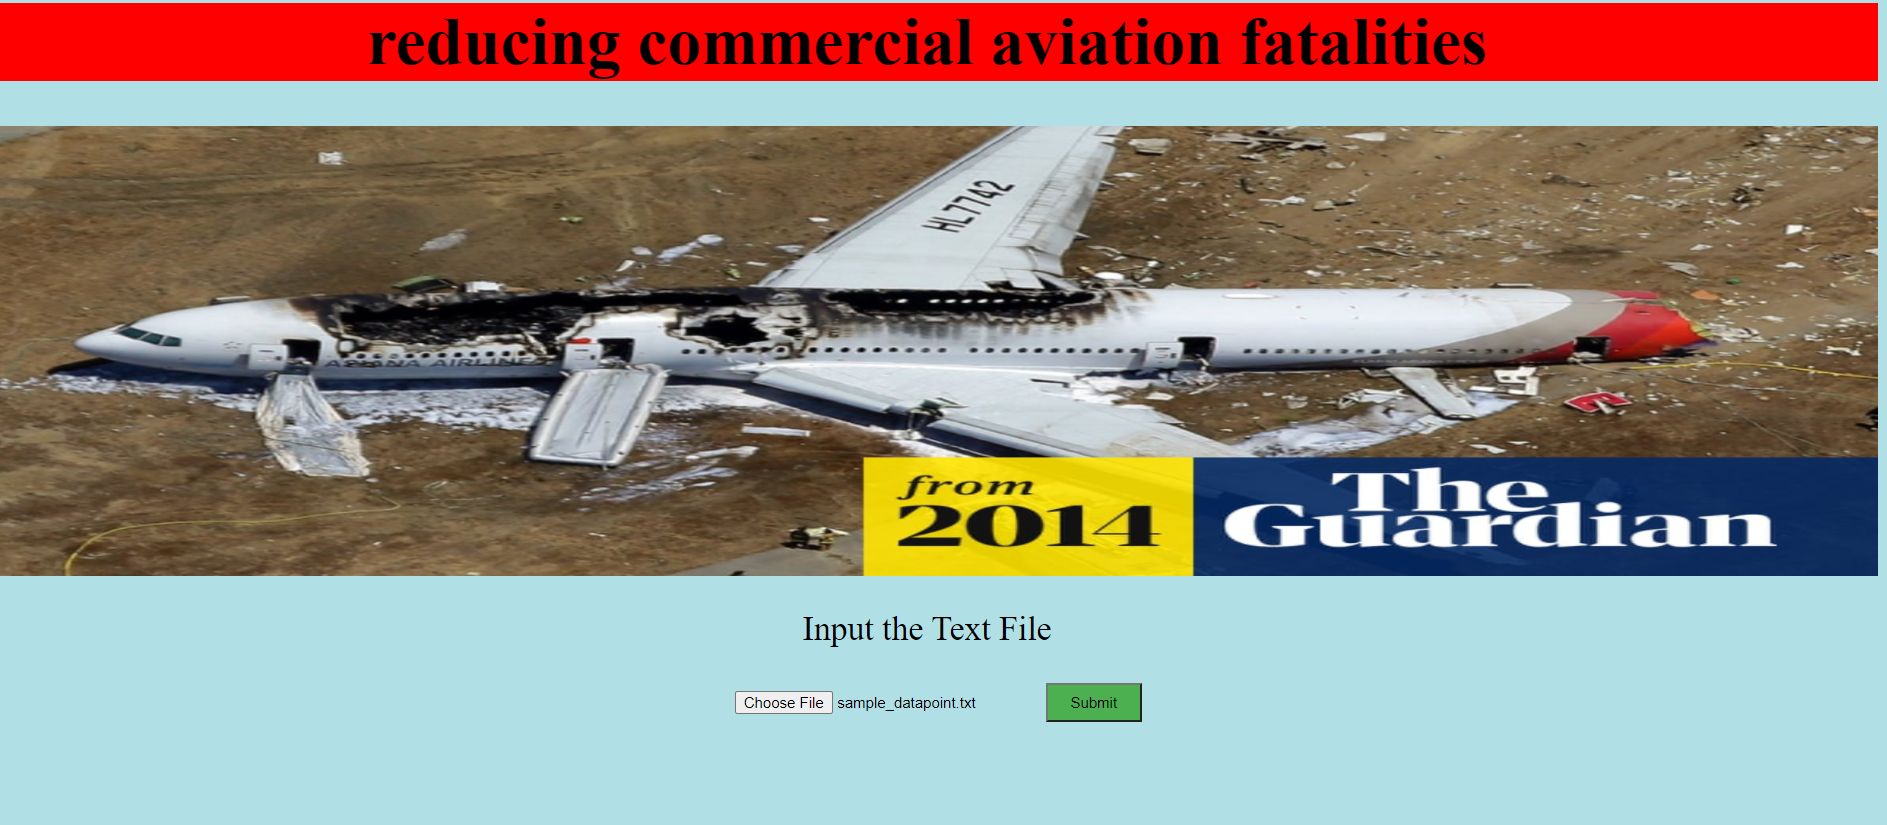

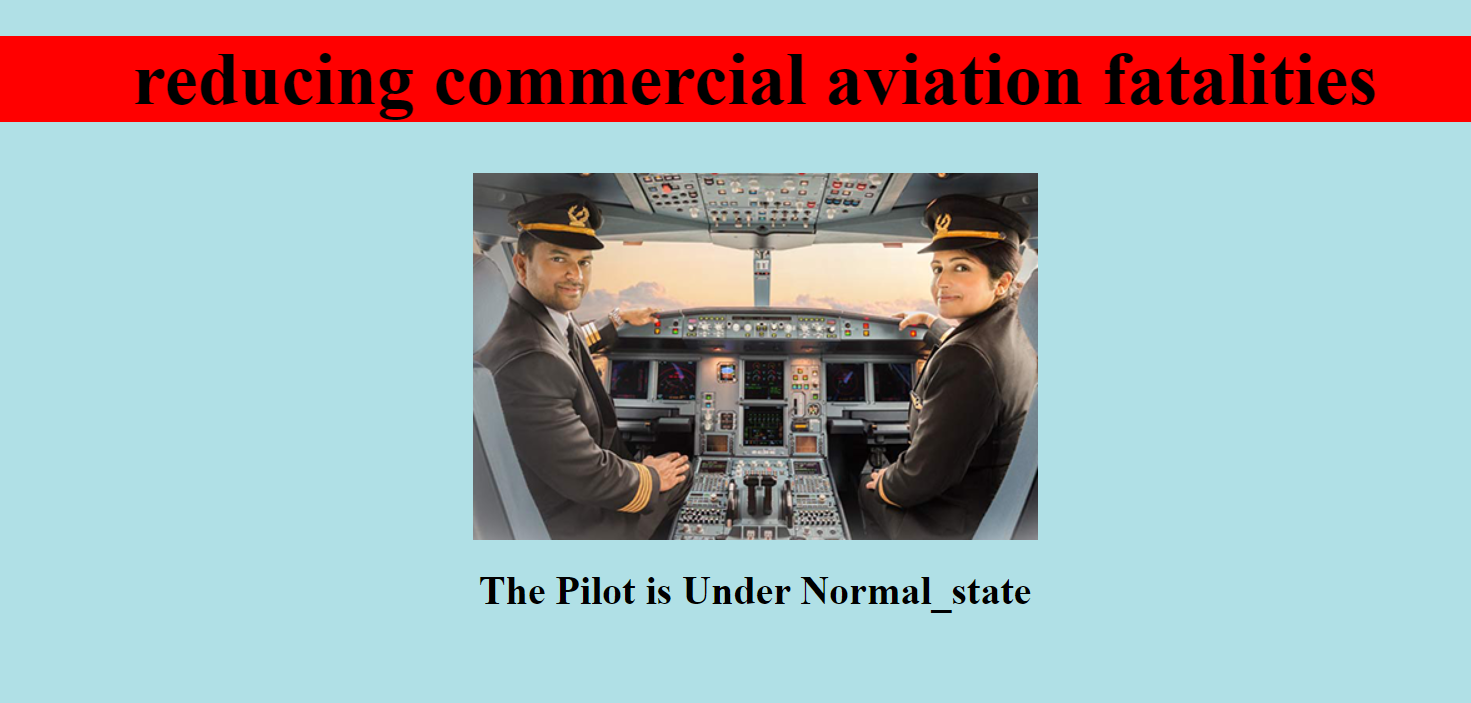

- **index.html**

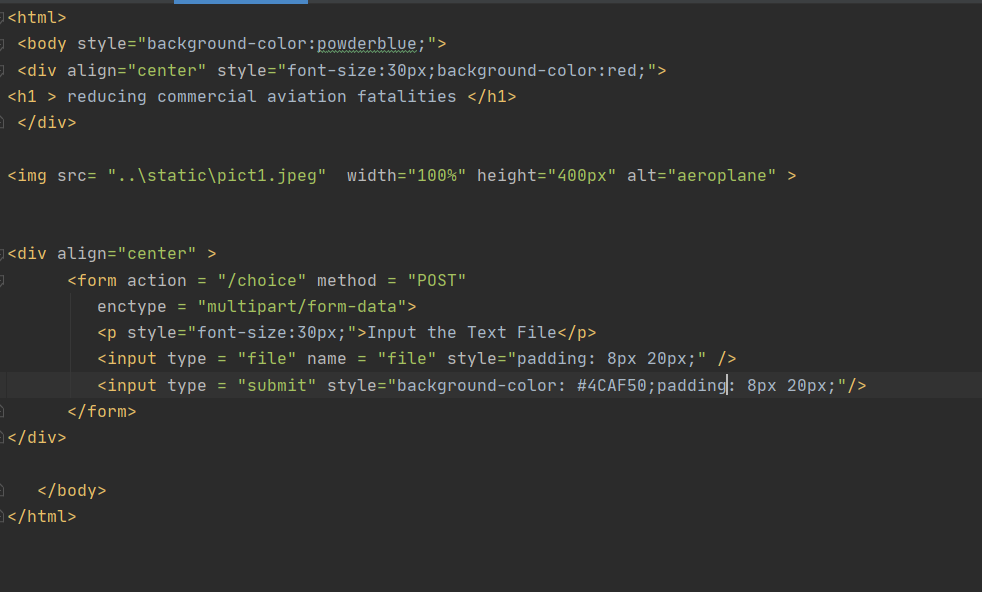

- **Results.html**

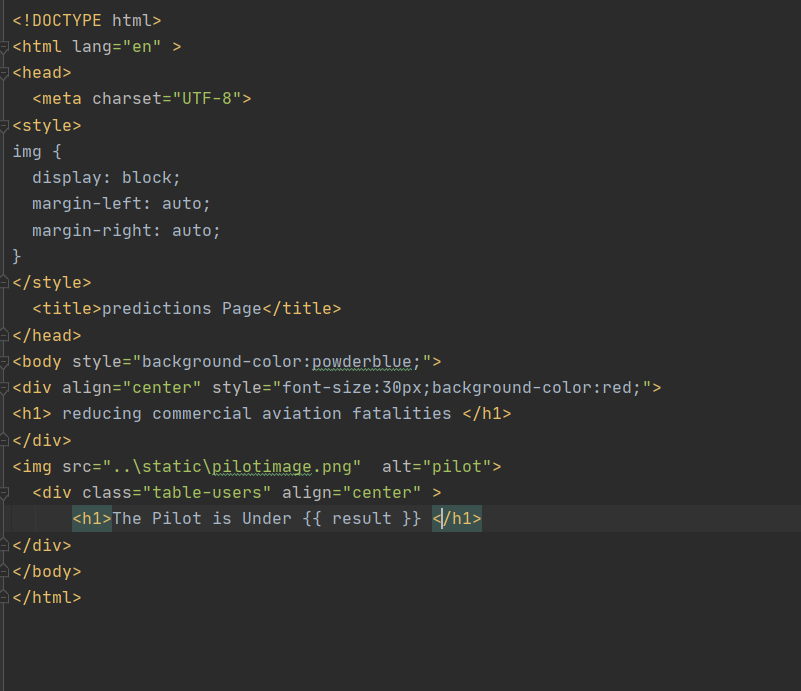